#**ANALISIS REGRESI SPASIAL - TUGAS 4**

In [ ]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’




In [ ]:
library(googledrive)
library(sf)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE



In [ ]:
#drive_find()

In [ ]:
# MEMUAT DAN MEMPERSIAPKAN DATA
#-------------------------------------------------------------------------------
# Mengunduh dataset
# ID file dari link Google Drive
file_id <- "1OlPStAgDaeclIA8SXN4pRTqCp00r1qSm"
# shp_id <- "1PrZS6qgK9PYU3uyvcGSbSq7ttPNydp1c"
# shx_id <- "1Pz0r1NP17VEGyVj8giC8sDOzZyziE4r_"
# dbf_id <- "1Q72f2NxYmX5u8uCyN3sRmdC_J3eM7lsi"
# cpg_id <- "1PwkjVhNKnfQ9MkVo2iDTgBaAtI7ubQZP"
# prj_id <- "1Q3tkaSy2G32Y9-7WFvwij0yZunlUduAC"
# sbx_id <- "1Pz2Vn2zbKWT3us97_LnVDZZFxsU2lChH"
# sbn_id <- "1Q-ML3RoWCWbxNT3QxbJftrGMqdGF5HMz"
shp_id2 <- "1QNh40wq1GzrW9CLKqqUK7wQESep7l0_m"
shx_id2 <- "1QBK7OC24D7ye564JKvY-P2yWdaBzH_uk"
dbf_id2 <- "1QV9mm4p-xBl34puijXK4uuJrisJXm3uS"
cpg_id2 <- "1QEnpvfRk6FN0ypTdE3evCRSQekupa_wM"
# Unduh file menggunakan ID
# Otentikasi Google Drive pertama kali
drive_download(as_id(file_id), path = "data.csv", overwrite = TRUE)
# drive_download(as_id(shp_id), path = "maps.shp", overwrite = TRUE)
# drive_download(as_id(shx_id), path = "maps.shx", overwrite = TRUE)
# drive_download(as_id(dbf_id), path = "maps.dbf", overwrite = TRUE)
# drive_download(as_id(cpg_id), path = "maps.cpg", overwrite = TRUE)
# drive_download(as_id(prj_id), path = "maps.prj", overwrite = TRUE)
# drive_download(as_id(sbx_id), path = "maps.sbx", overwrite = TRUE)
# drive_download(as_id(sbn_id), path = "maps.sbn", overwrite = TRUE)
drive_download(as_id(shp_id2), path = "maps2.shp", overwrite = TRUE)
drive_download(as_id(shx_id2), path = "maps2.shx", overwrite = TRUE)
drive_download(as_id(dbf_id2), path = "maps2.dbf", overwrite = TRUE)
drive_download(as_id(cpg_id2), path = "maps2.cpg", overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e8016cf00d01e3406928ca5e6f55ea37&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVVKUi14N2otZU93OUU3bEhXbnNVUG9Xd3RHbzRUSlk4SklnQlloblg0Sk5SX2FkRFo0LWNmZUhXZ0NoRFRVOGIzSHUwUSIsInN0YXRlIjoiZTgwMTZjZjAwZDAxZTM0MDY5MjhjYTVlNmY1NWVhMzcifQ==


File downloaded:

• Data Tugas 4 Spasial.csv <id: 1OlPStAgDaeclIA8SXN4pRTqCp00r1qSm>

Saved locally as:

• data.csv

File downloaded:

• Jawa_Timur_ADMIN_BPS.shp <id: 1QNh40wq1GzrW9CLKqqUK7wQESep7l0_m>

Saved locally as:

• maps2.shp

File downloaded:

• Jawa_Timur_ADMIN_BPS.shx <id: 1QBK7OC24D7ye564JKvY-P2yWdaBzH_uk>

Saved locally as:

• maps2.shx

File downloaded:

• Jawa_Timur_ADMIN_BPS.dbf <id: 1QV9mm4p-xBl34puijXK4uuJrisJXm3uS>

Saved locally as:

• maps2.dbf

File downloaded:

• Jawa_Timur_ADMIN_BPS.cpg <id: 1QEnpvfRk6FN0ypTdE3evCRSQekupa_wM>

Saved locally as:

• maps2.cpg



In [ ]:
# Baca file CSV ke dalam dataframe R
df <- read.csv("/content/data.csv")
print(head(df))
maps <- st_read("/content/maps2.shp")
print(head(maps))

  Kabupaten       Lat     Long     Y GiniRatio  RLS MEDIS  TPAK  MOTOR
1  Pasuruan -6.862310 108.8002  8.63     0.331 7.46    45 75.31 467988
2   Sampang -7.578256 109.2058 20.83     0.233 5.08    35 73.62 140363
3  Lamongan -7.406153 109.3947 12.16     0.281 8.48    40 74.80 555884
4   Pacitan -8.204614 111.0877 13.08     0.327 7.90    47 86.62 187184
5   Magetan -7.649341 111.3382  9.32     0.371 8.69    49 77.04 375980
6     Ngawi -7.389930 111.4619 13.81     0.289 7.84    51 75.73 413826
Reading layer `maps2' from data source `/content/maps2.shp' using driver `ESRI Shapefile'
Simple feature collection with 38 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 110.8987 ymin: -8.78036 xmax: 116.2702 ymax: -5.048857
CRS:           NA
Simple feature collection with 6 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 111.4236 ymin: -8.78036 xmax: 114.605 ymax: -5.714017
CRS:           NA
    ADM0_EN       date 

In [ ]:
install.packages("spdep")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spData’, ‘deldir’, ‘sp’




In [ ]:
library(spdep) # Load the spdep library
library(dplyr)

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# 4. MEMBUAT PEMBOBOT SPASIAL (SPATIAL WEIGHTS MATRIX)
df <- df[order(df$`Kabupaten`), ]
maps <- maps[order(maps$Kabupaten), ]
# Create a list of neighbours using the Queen criteria
w <- poly2nb(maps)
ww <- nb2listw(w, style = 'B')
ww

Warning message in poly2nb(maps):
“neighbour object has 2 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument.”


Characteristics of weights list object:
Neighbour list object:
Number of regions: 38 
Number of nonzero links: 138 
Percentage nonzero weights: 9.556787 
Average number of links: 3.631579 
2 disjoint connected subgraphs

Weights style: B 
Weights constants summary:
   n   nn  S0  S1   S2
B 38 1444 138 276 2712

In [ ]:
# Contoh melihat struktur objek w
print("Struktur objek w (neighbor list):")
print(str(w))
# Contoh melihat tetangga dari wilayah pertama (indeks 1)
print("\nTetangga wilayah pertama (indeks 1) di objek w:")
print(w[[1]])
# Contoh melihat struktur objek ww
print("\nStruktur objek ww (spatial weights list):")
print(str(ww))
# Contoh melihat bobot spasial untuk wilayah pertama di objek ww
# Ini akan menampilkan daftar tetangga dan bobotnya
print("\nBobot spasial untuk wilayah pertama di objek ww:")
print(ww$weights[[1]])
print("\nIndeks tetangga untuk wilayah pertama di objek ww:")
print(ww$neighbours[[1]])

[1] "Struktur objek w (neighbor list):"
List of 38
 $ : int 32
 $ : int [1:3] 5 7 34
 $ : int [1:4] 9 11 23 38
 $ : int [1:6] 8 19 21 25 26 37
 $ : int [1:4] 2 7 31 34
 $ : int [1:4] 18 19 24 33
 $ : int [1:4] 2 5 20 31
 $ : int [1:6] 4 9 19 23 24 25
 $ : int [1:6] 3 8 12 23 25 38
 $ : int [1:3] 23 24 29
 $ : int 3
 $ : int 9
 $ : int [1:2] 21 22
 $ : int 23
 $ : int 24
 $ : int 29
 $ : int 31
 $ : int [1:2] 6 33
 $ : int [1:5] 4 6 8 24 37
 $ : int [1:3] 7 23 31
 $ : int [1:6] 4 13 22 25 26 30
 $ : int [1:4] 13 21 26 30
 $ : int [1:9] 3 8 9 10 14 20 24 29 31
 $ : int [1:8] 6 8 10 15 19 23 29 33
 $ : int [1:6] 4 8 9 21 30 38
 $ : int [1:3] 4 21 22
 $ : int [1:2] 30 36
 $ : int [1:2] 32 35
 $ : int [1:6] 10 16 23 24 31 33
 $ : int [1:6] 21 22 25 27 36 38
 $ : int [1:7] 5 7 17 20 23 29 34
 $ : int [1:2] 1 28
 $ : int [1:4] 6 18 24 29
 $ : int [1:3] 2 5 31
 $ : int 28
 $ : int [1:3] 27 30 38
 $ : int [1:2] 4 19
 $ : int [1:5] 3 9 25 30 36
 - attr(*, "class")= chr "nb"
 - attr(*, "region.id

In [ ]:
sum(is.na(maps$'geometry'))

[1] 0

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(sp)
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
library(lmtest)
library(ggplot2)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.95 loaded



In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’




In [ ]:
library(GGally)
library(RColorBrewer)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
df <- df[!is.na(df$Y), ]

In [ ]:
# Uji Indeks Moran Tiap Variable
# Variabel Dependen
moran.test(df$Y, ww, alternative="two.sided")
# Variabel Independen
moran.test(df$GiniRatio, ww, alternative="two.sided")
# Variabel Independen
moran.test(df$RLS, ww, alternative="two.sided")
# Variabel Independen
moran.test(df$MEDIS, ww, alternative="two.sided")
# Variabel Independen
moran.test(df$MOTOR, ww, alternative="two.sided")


	Moran I test under randomisation

data:  df$Y  
weights: ww    

Moran I statistic standard deviate = 2.0699, p-value = 0.03846
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
       0.19982194       -0.02702703        0.01201116 



	Moran I test under randomisation

data:  df$GiniRatio  
weights: ww    

Moran I statistic standard deviate = 1.9432, p-value = 0.052
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
       0.18166856       -0.02702703        0.01153479 



	Moran I test under randomisation

data:  df$RLS  
weights: ww    

Moran I statistic standard deviate = 2.824, p-value = 0.004744
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
       0.28567789       -0.02702703        0.01226183 



	Moran I test under randomisation

data:  df$MEDIS  
weights: ww    

Moran I statistic standard deviate = 2.026, p-value = 0.04277
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.133724696      -0.027027027       0.006295556 



	Moran I test under randomisation

data:  df$MOTOR  
weights: ww    

Moran I statistic standard deviate = 2.7146, p-value = 0.006635
alternative hypothesis: two.sided
sample estimates:
Moran I statistic       Expectation          Variance 
      0.198383461      -0.027027027       0.006894885 


In [ ]:
install.packages("spatialreg")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘coda’, ‘LearnBayes’, ‘multcomp’




In [ ]:
library(spatialreg)

Loading required package: Matrix


Attaching package: ‘spatialreg’


The following objects are masked from ‘package:spdep’:

    get.ClusterOption, get.coresOption, get.mcOption,
    get.VerboseOption, get.ZeroPolicyOption, set.ClusterOption,
    set.coresOption, set.mcOption, set.VerboseOption,
    set.ZeroPolicyOption




In [ ]:
str(df)

'data.frame':	38 obs. of  9 variables:
 $ Kabupaten: chr  "Bangkalan" "Banyuwangi" "Blitar" "Bojonegoro" ...
 $ Lat      : num  -7.03 -8.22 -8.1 -7.23 -7.92 ...
 $ Long     : num  113 114 112 112 114 ...
 $ Y        : num  18.66 6.54 8.16 11.69 12.6 ...
 $ GiniRatio: num  0.301 0.312 0.353 0.31 0.333 0.322 0.321 0.302 0.3 0.327 ...
 $ RLS      : num  6.01 7.78 7.87 7.59 6.53 ...
 $ MEDIS    : int  24 36 35 58 40 54 57 57 59 12 ...
 $ TPAK     : num  70.5 75.4 72.4 73.9 75.1 ...
 $ MOTOR    : int  245175 756029 493701 512334 184105 727397 725747 608569 771741 168249 ...


In [ ]:
summary(ww)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 38 
Number of nonzero links: 138 
Percentage nonzero weights: 9.556787 
Average number of links: 3.631579 
2 disjoint connected subgraphs
Link number distribution:

1 2 3 4 5 6 7 8 9 
8 6 6 6 2 7 1 1 1 
8 least connected regions:
1 11 12 14 15 16 17 35 with 1 link
1 most connected region:
23 with 9 links

Weights style: B 
Weights constants summary:
   n   nn  S0  S1   S2
B 38 1444 138 276 2712

In [ ]:
cor(df[, c("GiniRatio", "RLS", "MEDIS", "TPAK", "MOTOR")])

,GiniRatio,RLS,MEDIS,TPAK,MOTOR
GiniRatio,1.0000000,0.5570170,0.2090370,-0.1997841,0.1311035
RLS,0.5570170,1.0000000,0.2284679,-0.4535245,0.2762724
MEDIS,0.2090370,0.2284679,1.0000000,-0.1285896,0.9314471
TPAK,-0.1997841,-0.4535245,-0.1285896,1.0000000,-0.2576681
MOTOR,0.1311035,0.2762724,0.9314471,-0.2576681,1.0000000


In [ ]:
# ANALISIS 3 MODEL (UNTUK BAB 4.3)
formula <- Y ~ GiniRatio + RLS + MEDIS + MOTOR
#-------------
# MODEL 1: OLS (Ordinary Least Squares) - Model Non-Spasial
#-------------
model_ols <- lm(formula, data = df)
summary(model_ols)


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2188 -1.3762 -0.0764  1.1948  4.3407 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.263e+01  3.316e+00   9.840 2.42e-11 ***
GiniRatio   -3.163e+01  1.265e+01  -2.500   0.0176 *  
RLS         -1.508e+00  2.770e-01  -5.445 4.96e-06 ***
MEDIS        6.931e-02  3.097e-02   2.238   0.0321 *  
MOTOR       -5.665e-06  2.173e-06  -2.607   0.0136 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.228 on 33 degrees of freedom
Multiple R-squared:  0.7506,	Adjusted R-squared:  0.7203 
F-statistic: 24.83 on 4 and 33 DF,  p-value: 1.5e-09


In [ ]:
vif(lm(formula, data = df))

GiniRatio       RLS     MEDIS     MOTOR 
 1.644228  1.659229  8.616857  8.758640

In [ ]:
#-------------
# MODEL 2: Spatial Lag Model (SLM)
#-------------
# Menggunakan lagsarlm() dari library spatialreg
model_slm <- lagsarlm(formula, data = df, listw = ww)
summary(model_slm)


Call:lagsarlm(formula = formula, data = df, listw = ww)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.29567 -1.30049  0.11694  1.16984  3.93045 

Type: lag 
Coefficients: (asymptotic standard errors) 
               Estimate  Std. Error z value  Pr(>|z|)
(Intercept)  3.5588e+01  3.4005e+00 10.4655 < 2.2e-16
GiniRatio   -3.3308e+01  1.1377e+01 -2.9277  0.003414
RLS         -1.6613e+00  2.7014e-01 -6.1498 7.757e-10
MEDIS        6.3486e-02  2.8242e-02  2.2480  0.024579
MOTOR       -5.0608e-06  2.0013e-06 -2.5288  0.011446

Rho: -0.031652, LR test value: 2.6049, p-value: 0.10653
Asymptotic standard error: 0.018098
    z-value: -1.7489, p-value: 0.080313
Wald statistic: 3.0586, p-value: 0.080313

Log likelihood: -80.38159 for lag model
ML residual variance (sigma squared): 4.0116, (sigma: 2.0029)
Number of observations: 38 
Number of parameters estimated: 7 
AIC: 174.76, (AIC for lm: 175.37)
LM test for residual autocorrelation
test value: 0.17527, p-value: 0.67547


In [ ]:
#-------------
# MODEL 3: Spatial Error Model (SEM)
#-------------
# Menggunakan errorsarlm() dari library spatialreg
model_sem <- errorsarlm(formula, data = df, listw = ww)
summary(model_sem)


Call:errorsarlm(formula = formula, data = df, listw = ww)

Residuals:
      Min        1Q    Median        3Q       Max 
-4.191796 -1.501315 -0.035765  1.132801  3.706161 

Type: error 
Coefficients: (asymptotic standard errors) 
               Estimate  Std. Error z value  Pr(>|z|)
(Intercept)  3.2422e+01  3.2303e+00 10.0370 < 2.2e-16
GiniRatio   -2.5515e+01  1.2571e+01 -2.0296   0.04239
RLS         -1.6707e+00  2.7546e-01 -6.0652 1.318e-09
MEDIS        5.3759e-02  2.9571e-02  1.8179   0.06907
MOTOR       -4.6618e-06  2.0835e-06 -2.2375   0.02525

Lambda: 0.075242, LR test value: 1.0575, p-value: 0.30379
Asymptotic standard error: 0.049041
    z-value: 1.5342, p-value: 0.12497
Wald statistic: 2.3539, p-value: 0.12497

Log likelihood: -81.15528 for error model
ML residual variance (sigma squared): 4.098, (sigma: 2.0244)
Number of observations: 38 
Number of parameters estimated: 7 
AIC: 176.31, (AIC for lm: 175.37)


In [ ]:
# Uji Moran's I pada RESIDUAL dari model OLS.
# Ini penting untuk justifikasi penggunaan model spasial.
# Jika residualnya masih menunjukkan pola spasial, artinya OLS tidak cukup.
print(moran.test(model_ols$residuals, listw = ww))
print(moran.test(model_slm$residuals, listw = ww))
print(moran.test(model_sem$residuals, listw = ww))


	Moran I test under randomisation

data:  model_ols$residuals  
weights: ww    

Moran I statistic standard deviate = 1.1151, p-value = 0.1324
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
       0.09647716       -0.02702703        0.01226684 


	Moran I test under randomisation

data:  model_slm$residuals  
weights: ww    

Moran I statistic standard deviate = 0.67997, p-value = 0.2483
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
       0.04823760       -0.02702703        0.01225178 


	Moran I test under randomisation

data:  model_sem$residuals  
weights: ww    

Moran I statistic standard deviate = 0.19616, p-value = 0.4222
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     -0.005281305      -0.027027027       0.012289860 



In [ ]:
model_sac <- sacsarlm(formula, data = df, listw = ww)
summary(model_sac)


Call:sacsarlm(formula = formula, data = df, listw = ww)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.26735 -1.26279  0.23015  1.20263  4.10763 

Type: sac 
Coefficients: (asymptotic standard errors) 
               Estimate  Std. Error z value  Pr(>|z|)
(Intercept)  3.5140e+01  3.5179e+00  9.9888 < 2.2e-16
GiniRatio   -2.9943e+01  1.1852e+01 -2.5263   0.01153
RLS         -1.7355e+00  2.8560e-01 -6.0767 1.227e-09
MEDIS        5.7330e-02  2.8833e-02  1.9884   0.04677
MOTOR       -4.6859e-06  2.0500e-06 -2.2857   0.02227

Rho: -0.02982
Asymptotic standard error: 0.019919
    z-value: -1.4971, p-value: 0.13438
Lambda: 0.038057
Asymptotic standard error: 0.058435
    z-value: 0.65127, p-value: 0.51487

LR test value: 2.8642, p-value: 0.2388

Log likelihood: -80.25192 for sac model
ML residual variance (sigma squared): 3.964, (sigma: 1.991)
Number of observations: 38 
Number of parameters estimated: 8 
AIC: 176.5, (AIC for lm: 175.37)


In [ ]:
model_SLX <- lmSLX(formula, data = df, listw = ww)
summary(model_SLX)


Call:
lm(formula = formula(paste("y ~ ", paste(colnames(x)[-1], collapse = "+"))), 
    data = as.data.frame(x), weights = weights)

Coefficients:
                 Estimate    Std. Error  t value     Pr(>|t|)  
(Intercept)       3.494e+01   4.273e+00   8.179e+00   6.660e-09
GiniRatio        -1.635e+01   1.501e+01  -1.089e+00   2.853e-01
RLS              -2.146e+00   3.547e-01  -6.050e+00   1.598e-06
MEDIS             3.784e-02   3.313e-02   1.142e+00   2.632e-01
MOTOR            -3.745e-06   2.347e-06  -1.596e+00   1.218e-01
lag..Intercept.  -1.832e+00   2.738e+00  -6.694e-01   5.087e-01
lag.GiniRatio    -4.897e+00   7.122e+00  -6.876e-01   4.974e-01
lag.RLS           3.056e-01   1.668e-01   1.832e+00   7.765e-02
lag.MEDIS         2.459e-02   1.824e-02   1.348e+00   1.885e-01
lag.MOTOR        -1.251e-06   1.083e-06  -1.156e+00   2.576e-01


In [ ]:
print(moran.test(model_sac$residuals, listw = ww))
print(moran.test(model_SLX$residuals, listw = ww))


	Moran I test under randomisation

data:  model_sac$residuals  
weights: ww    

Moran I statistic standard deviate = 0.28919, p-value = 0.3862
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.004964111      -0.027027027       0.012237723 


	Moran I test under randomisation

data:  model_SLX$residuals  
weights: ww    

Moran I statistic standard deviate = -0.04784, p-value = 0.5191
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      -0.03224656       -0.02702703        0.01190391 



In [ ]:
# PERBANDINGAN MODEL (UNTUK BAB 4.4)
#-------------------------------------------------------------------------------
# Kita akan membandingkan model berdasarkan Akaike Information Criterion (AIC).
# Model dengan BIC TERKECIL dianggap sebagai model terbaik.
# Membuat tabel perbandingan

# Bandingkan model menggunakan AIC, BIC, LogLik, R-squared
# Hitung R-squared untuk OLS
r2_ols <- summary(model_ols)$r.squared

# Untuk SLM dan SEM, gunakan Nagelkerke pseudo R-squared
# Biasanya spatialreg::summary() menyediakan itu di $NK atau $pseudo.r.squared
# Tapi kita bisa hitung sendiri pakai rumus umum pseudo R2:
# R² = 1 - (LogLik_model / LogLik_null)
# Namun untuk ringkasnya, kita ambil dari summary langsung (jika tersedia)

r2_slm <- summary(model_slm)$NK  # Nagelkerke pseudo R2 (SLM)
r2_sem <- summary(model_sem)$NK  # Nagelkerke pseudo R2 (SEM)

# Buat tabel perbandingan
model_comparison <- data.frame(
  Model = c("OLS", "Spatial Lag (SLM)", "Spatial Error (SEM)"),
  AIC = c(AIC(model_ols), AIC(model_slm), AIC(model_sem)),
  BIC = c(BIC(model_ols), BIC(model_slm), BIC(model_sem)),
  LogLikelihood = c(logLik(model_ols), logLik(model_slm), logLik(model_sem)),
  R_squared = c(r2_ols, r2_slm, r2_sem),
  stringsAsFactors = FALSE
)

# Likelihood Ratio Test (p-value) dibandingkan terhadap model OLS
pval_slm <- lrtest(model_ols, model_slm)$`Pr(>Chisq)`[2]
pval_sem <- lrtest(model_ols, model_sem)$`Pr(>Chisq)`[2]

# Tambahkan p-value
model_comparison$`p-value vs OLS` <- c(NA, pval_slm, pval_sem)

# Urutkan berdasarkan AIC
model_comparison <- model_comparison %>% arrange(BIC)

# Cetak hasil
print("--- Perbandingan Kebaikan Model ---")
print(model_comparison)

Warning message in modelUpdate(objects[[i - 1]], objects[[i]]):
“original model was of class "lm", updated model is of class "Sarlm"”
Warning message in modelUpdate(objects[[i - 1]], objects[[i]]):
“original model was of class "lm", updated model is of class "Sarlm"”


[1] "--- Perbandingan Kebaikan Model ---"
                Model      AIC      BIC LogLikelihood R_squared p-value vs OLS
1                 OLS 175.3681 185.1936     -81.68403 0.7505786             NA
2   Spatial Lag (SLM) 174.7632 186.2263     -80.38159 0.7505786      0.1065349
3 Spatial Error (SEM) 176.3106 187.7737     -81.15528 0.7505786      0.3037852


In [ ]:
install.packages("tmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘logger’, ‘geometries’, ‘rapidjsonr’, ‘sfheaders’, ‘lazyeval’, ‘png’, ‘stringdist’, ‘colorspace’, ‘spacesXYZ’, ‘geojsonsf’, ‘raster’, ‘jsonify’, ‘crosstalk’, ‘leaflet.providers’, ‘terra’, ‘slippymath’, ‘lwgeom’, ‘dichromat’, ‘XML’, ‘cols4all’, ‘leafem’, ‘leafgl’, ‘leaflegend’, ‘leaflet’, ‘leafsync’, ‘maptiles’, ‘stars’, ‘tmaptools’, ‘servr’




In [ ]:
library(tmap)



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_fill()`: instead of `style = "quantile"`, use fill.scale =
`tm_scale_intervals()`.
ℹ Migrate the argument(s) 'style', 'midpoint', 'palette' (rename to 'values')
  to 'tm_scale_intervals(<HERE>)'
For small multiples, specify a 'tm_scale_' for each multiple, and put them in a
list: 'fill'.scale = list(<scale1>, <scale2>, ...)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `fill` namely 'title' to 'fill.legend = tm_legend(<HERE>)'
[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `fill` namely 'title' to 'fill.legend = tm_legend(<HERE>)'
[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `

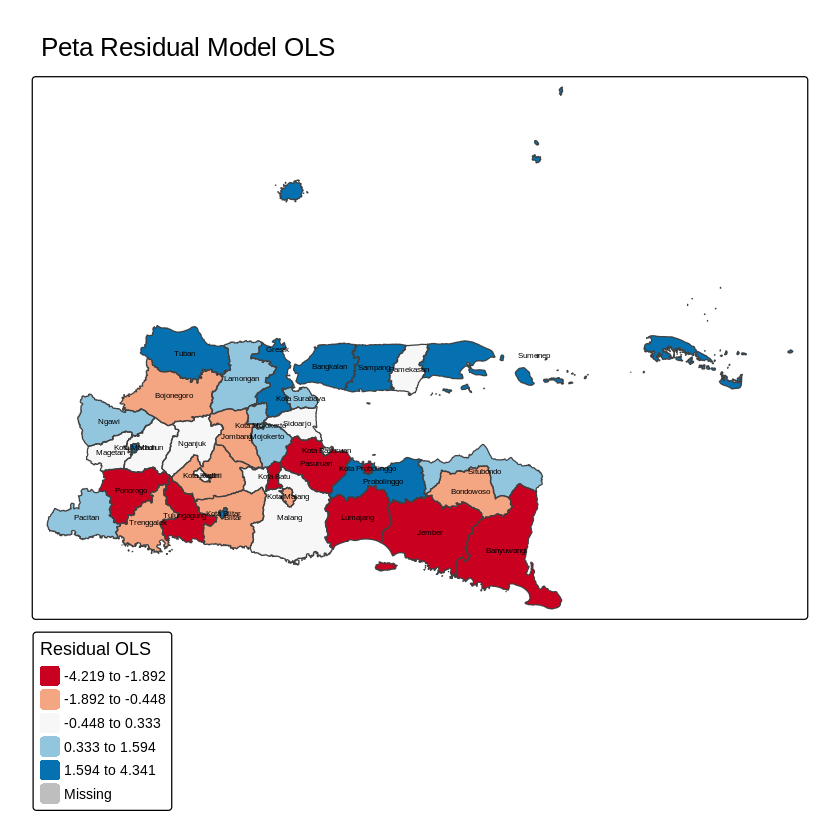

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "RdBu" is named
"brewer.rd_bu"
Multiple palettes called "rd_bu" found: "brewer.rd_bu", "matplotlib.rd_bu". The first one, "brewer.rd_bu", is returned.



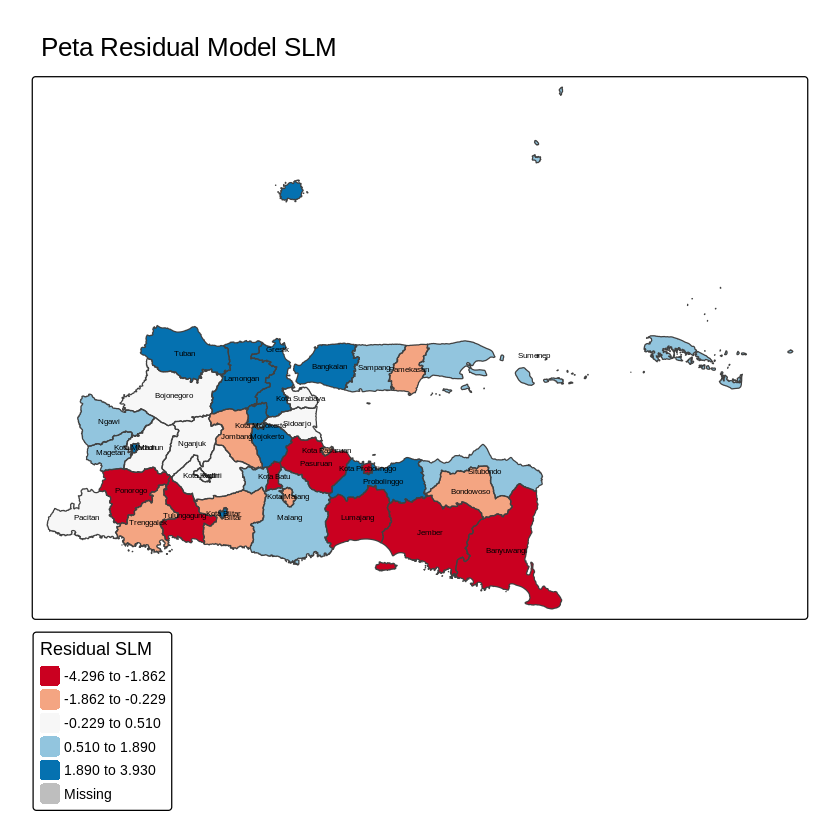

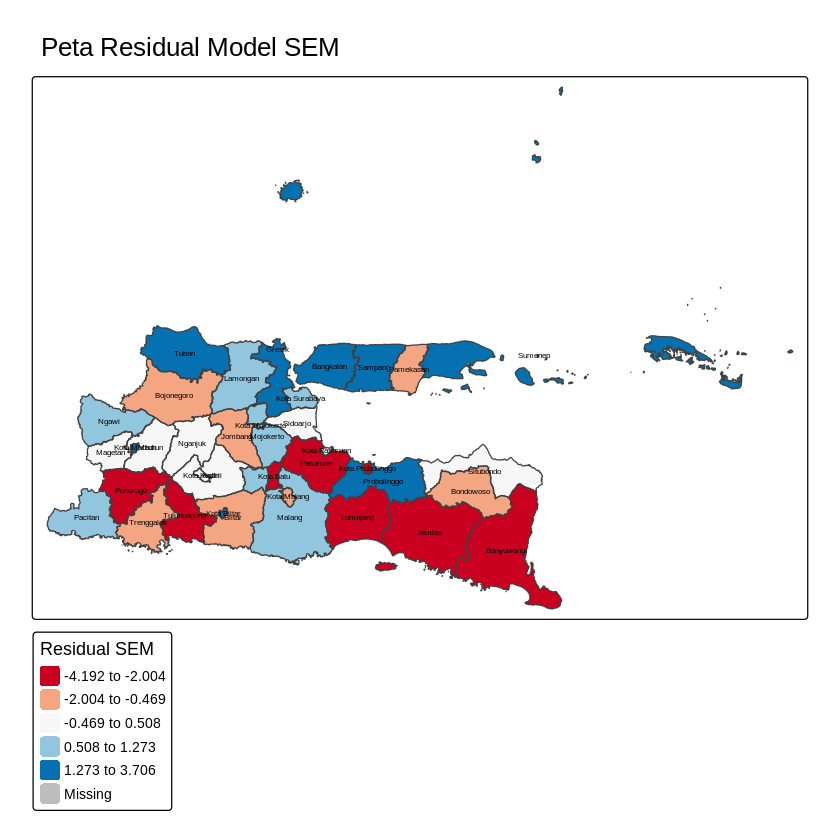

In [ ]:
# Buat peta residual
# PETA RESIDUAL (UNTUK BAB 4.4)
#-------------------------------------------------------------------------------
# Menambahkan residual dari setiap model ke data frame untuk dipetakan
df$residual_ols <- residuals(model_ols)
df$residual_slm <- residuals(model_slm)
df$residual_sem <- residuals(model_sem)
# Gabungkan data residual dengan data spasial
maps_with_res <- merge(maps, df, by.x = "Kabupaten", by.y = "Kabupaten")
# Membuat peta residual OLS
map_res_ols <- tm_shape(maps_with_res) +
    tm_fill("residual_ols", palette = "RdBu", style = "quantile", midpoint = 0, title = "Residual OLS") +
    tm_borders() + # Add borders for better visualization
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_title("Peta Residual Model OLS")
# Membuat peta residual SLM
map_res_slm <- tm_shape(maps_with_res) +
    tm_fill("residual_slm", palette = "RdBu", style = "quantile", midpoint = 0, title = "Residual SLM") +
    tm_borders() + # Add borders for better visualization
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_title("Peta Residual Model SLM")
# Membuat peta residual SEM
map_res_sem <- tm_shape(maps_with_res) +
    tm_fill("residual_sem", palette = "RdBu", style = "quantile", midpoint = 0, title = "Residual SEM") +
    tm_borders() + # Add borders for better visualization
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_title("Peta Residual Model SEM")
# Menampilkan peta-peta residual
# Model yang baik akan memiliki residual yang tersebar acak (tidak berpola)
print(map_res_ols)
print(map_res_slm)
map_res_sem



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_fill()`: instead of `style = "cont"`, use fill.scale =
`tm_scale_continuous()`.
ℹ Migrate the argument(s) 'midpoint', 'palette' (rename to 'values') to
  'tm_scale_continuous(<HERE>)'
For small multiples, specify a 'tm_scale_' for each multiple, and put them in a
list: 'fill'.scale = list(<scale1>, <scale2>, ...)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `fill` namely 'title' to 'fill.legend = tm_legend(<HERE>)'
[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
Multiple palettes called "rd_bu" found: "brewer.rd_bu", "matplotlib.rd_bu". The first one, "brewer.rd_bu", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "-RdBu" is named


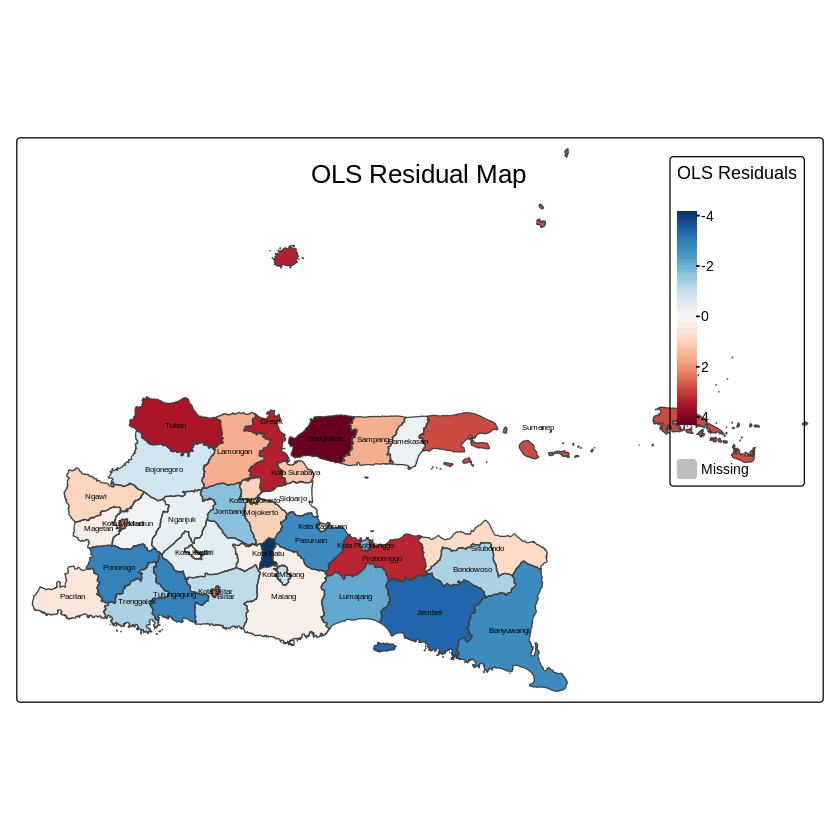

In [ ]:
map_res_ols <- tm_shape(maps_with_res) +
    tm_fill("residual_ols",
            palette = "-RdBu",     # Negative to positive (blue to red)
            style = "cont",        # Continuous scale, not quantile
            midpoint = 0,
            title = "OLS Residuals") +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Semi-transparent background
        legend.width = c(8),
        legend.frame = FALSE,
        title = "OLS Residual Map",             # Title in English
        title.position = c("center", "top")     # Optional: adjust title position
    )
print(map_res_ols)
tmap_save(map_res_ols, filename = "map_res_ols.png", width = 12, height = 8, units = "in")



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_fill()`: instead of `style = "cont"`, use fill.scale =
`tm_scale_continuous()`.
ℹ Migrate the argument(s) 'midpoint', 'palette' (rename to 'values') to
  'tm_scale_continuous(<HERE>)'
For small multiples, specify a 'tm_scale_' for each multiple, and put them in a
list: 'fill'.scale = list(<scale1>, <scale2>, ...)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `fill` namely 'title' to 'fill.legend = tm_legend(<HERE>)'
[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
Multiple palettes called "rd_bu" found: "brewer.rd_bu", "matplotlib.rd_bu". The first one, "brewer.rd_bu", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "-RdBu" is named


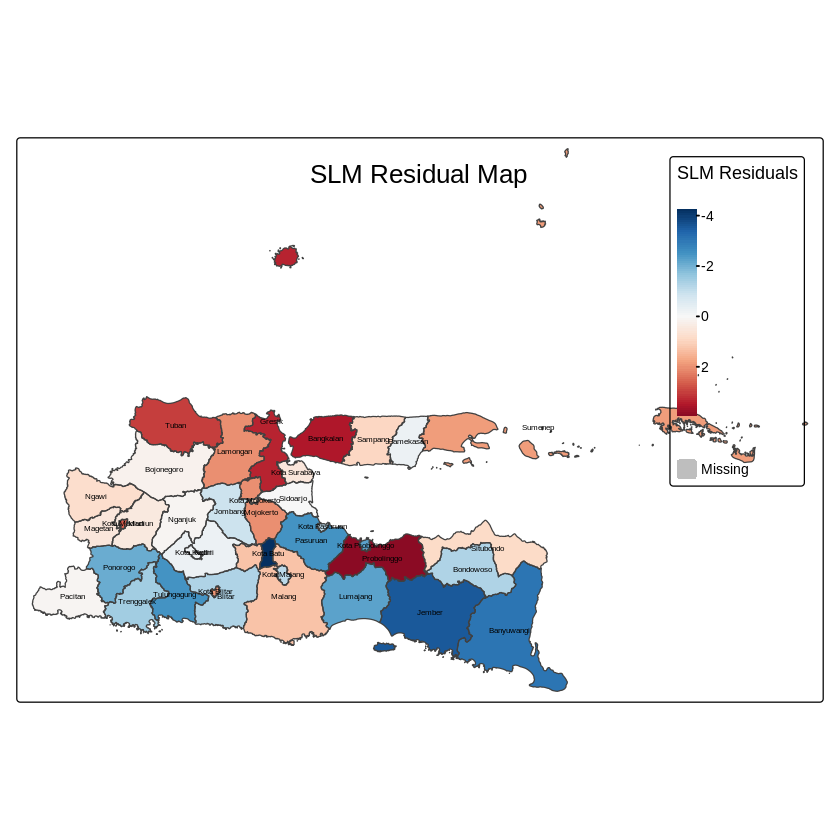

In [ ]:
map_res_slm <- tm_shape(maps_with_res) +
    tm_fill("residual_slm",
            palette = "-RdBu",     # Negative to positive (blue to red)
            style = "cont",        # Continuous scale, not quantile
            midpoint = 0,
            title = "SLM Residuals") +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Semi-transparent background
        legend.width = c(8),
        legend.frame = FALSE,
        title = "SLM Residual Map",             # Title in English
        title.position = c("center", "top")     # Optional: adjust title position
    )
print(map_res_slm)
tmap_save(map_res_slm, filename = "map_res_slm.png", width = 12, height = 8, units = "in")



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_fill()`: instead of `style = "cont"`, use fill.scale =
`tm_scale_continuous()`.
ℹ Migrate the argument(s) 'midpoint', 'palette' (rename to 'values') to
  'tm_scale_continuous(<HERE>)'
For small multiples, specify a 'tm_scale_' for each multiple, and put them in a
list: 'fill'.scale = list(<scale1>, <scale2>, ...)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `fill` namely 'title' to 'fill.legend = tm_legend(<HERE>)'
[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
Multiple palettes called "rd_bu" found: "brewer.rd_bu", "matplotlib.rd_bu". The first one, "brewer.rd_bu", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "-RdBu" is named


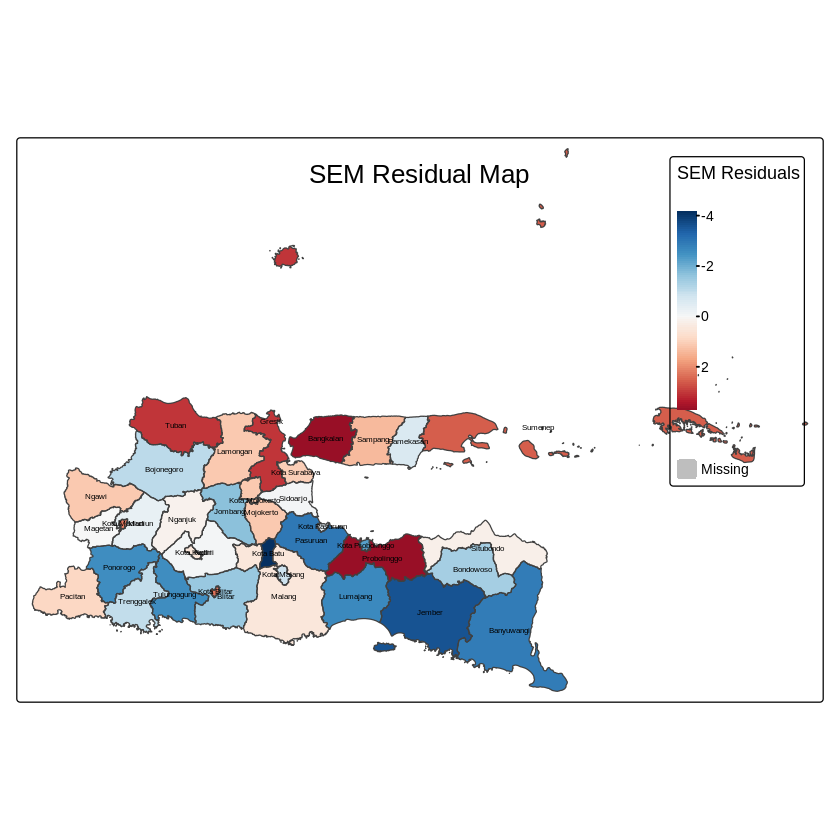

In [ ]:
map_res_sem <- tm_shape(maps_with_res) +
    tm_fill("residual_sem",
            palette = "-RdBu",     # Negative to positive (blue to red)
            style = "cont",        # Continuous scale, not quantile
            midpoint = 0,
            title = "SEM Residuals") +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Semi-transparent background
        legend.width = c(8),
        legend.frame = FALSE,
        title = "SEM Residual Map",             # Title in English
        title.position = c("center", "top")     # Optional: adjust title position
    )
print(map_res_sem)
tmap_save(map_res_sem, filename = "map_res_sem.png", width = 12, height = 8, units = "in")



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_fill()`: instead of `style = "cont"`, use fill.scale =
`tm_scale_continuous()`.
ℹ Migrate the argument(s) 'midpoint', 'palette' (rename to 'values') to
  'tm_scale_continuous(<HERE>)'
For small multiples, specify a 'tm_scale_' for each multiple, and put them in a
list: 'fill'.scale = list(<scale1>, <scale2>, ...)'
[v3->v4] `tm_fill()`: migrate the argument(s) related to the legend of the
visual variable `fill` namely 'title' to 'fill.legend = tm_legend(<HERE>)'
[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is re

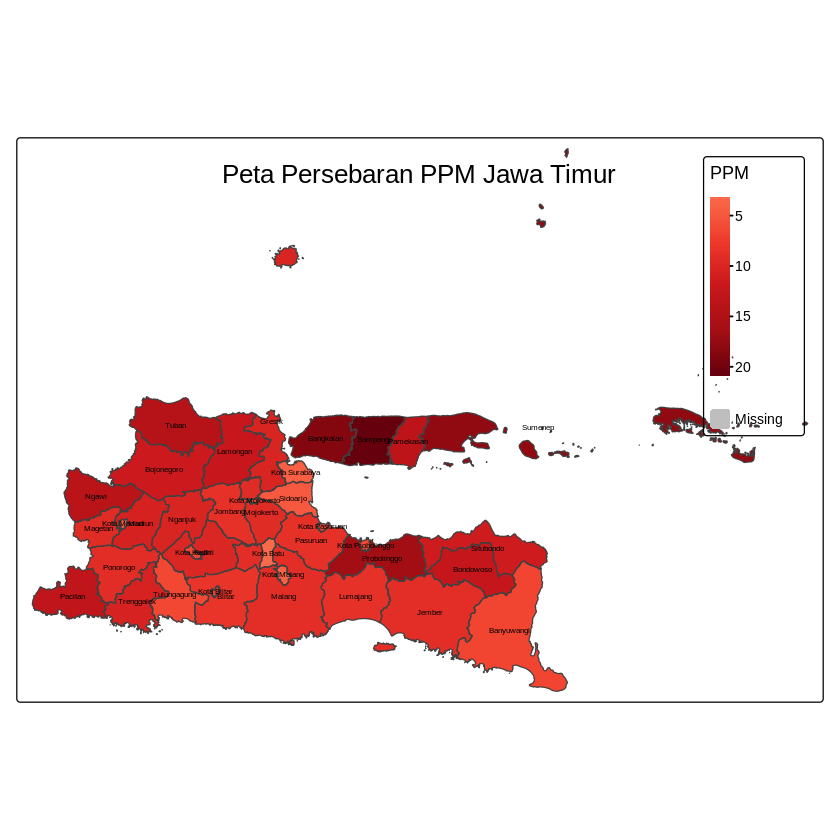

In [ ]:
map_Y <- tm_shape(maps_with_res) +
    tm_fill("Y",
            palette = "Reds",     # Negative to positive (blue to red)
            style = "cont",        # Continuous scale, not quantile
            midpoint = 0,
            title = "PPM") +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Semi-transparent background
        legend.width = c(6),
        legend.frame = FALSE,
        title = "Peta Persebaran PPM Jawa Timur",             # Title in English
        title.position = c("center", "top")     # Optional: adjust title position
    )
print(map_Y)
tmap_save(map_Y, filename = "Y_map.png", width = 12, height = 8, units = "in")

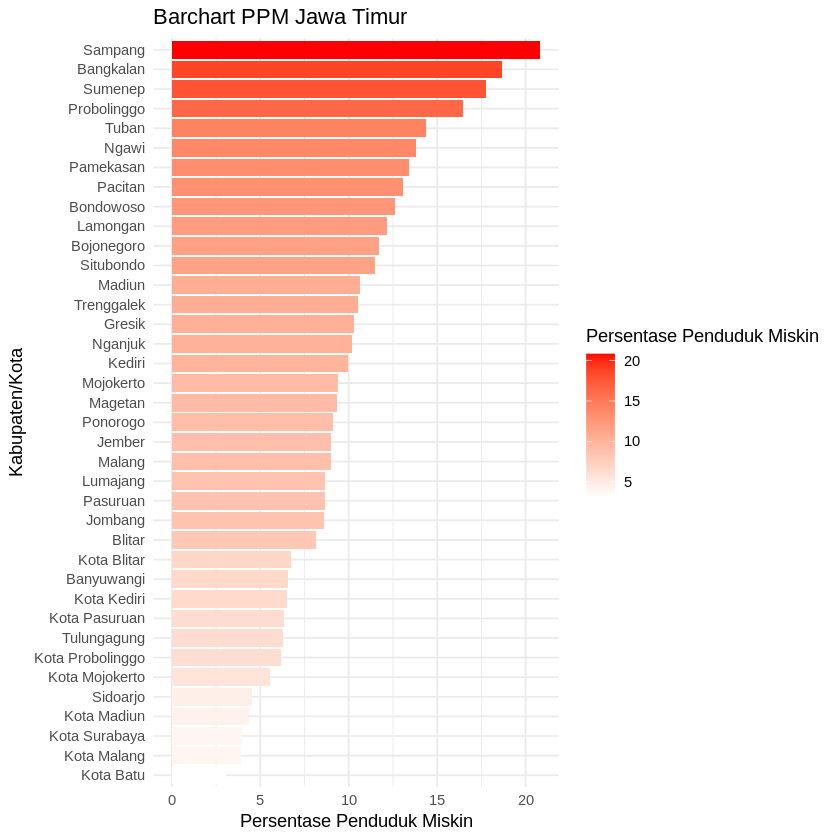

In [ ]:
# Urutkan dari yang paling tinggi
maps_bar <- maps_with_res %>%
  st_drop_geometry() %>%   # Drop geometry untuk plot biasa
  arrange(desc(Y))

# Plot
ggplot(maps_bar, aes(x = reorder(Kabupaten, Y), y = Y, fill = Y)) +
  geom_col() +
  coord_flip() +
  scale_fill_gradient(low = "white", high = "red", name = "Persentase Penduduk Miskin") +
  labs(
    x = "Kabupaten/Kota",
    y = "Persentase Penduduk Miskin",
    title = "Barchart PPM Jawa Timur"
  ) +
  theme_minimal()



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

Map saved to /content/Gini Ratio_map.png

Resolution: 3600 by 2400 pixels

Size: 12 by 8 inches (300 dpi)



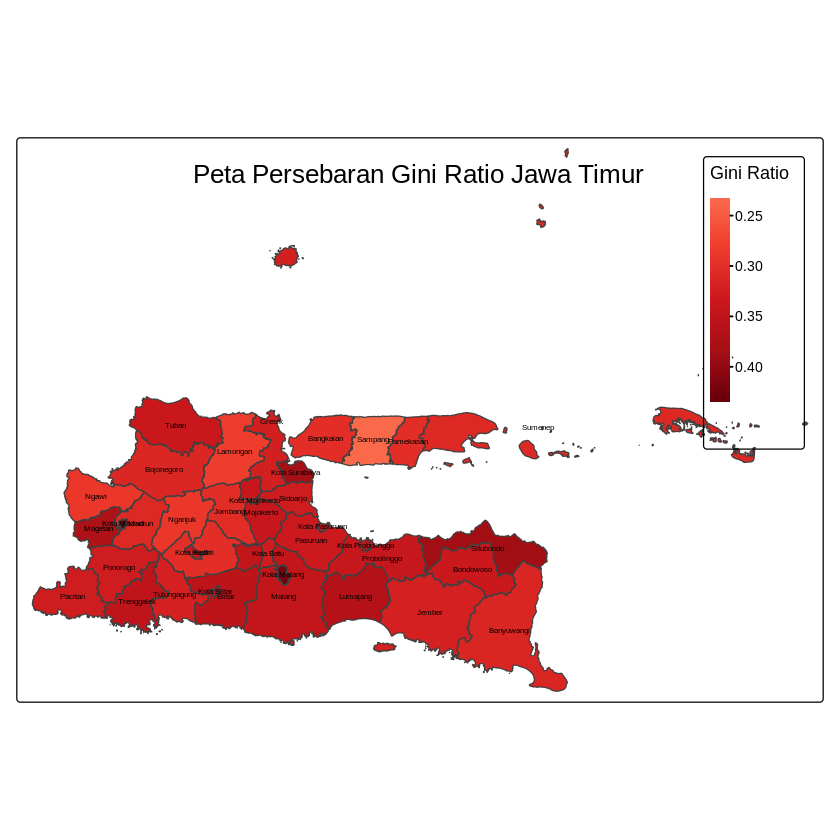

In [ ]:
# Load the shapefile again since the geometry was dropped in a previous step
GiniRatio_map <- tm_shape(maps_with_res) +
    tm_fill("GiniRatio",
            fill.scale = tm_scale_continuous(values = "Reds", midpoint = 0),
            fill.legend = tm_legend(title = "Gini Ratio")) +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Transparent background
        legend.width = c(6),
        legend.frame = FALSE
    ) +
    tm_title("Peta Persebaran Gini Ratio Jawa Timur", position = c("center", "top"))

print(GiniRatio_map)
tmap_save(GiniRatio_map, filename = "Gini Ratio_map.png", width = 12, height = 8, units = "in")

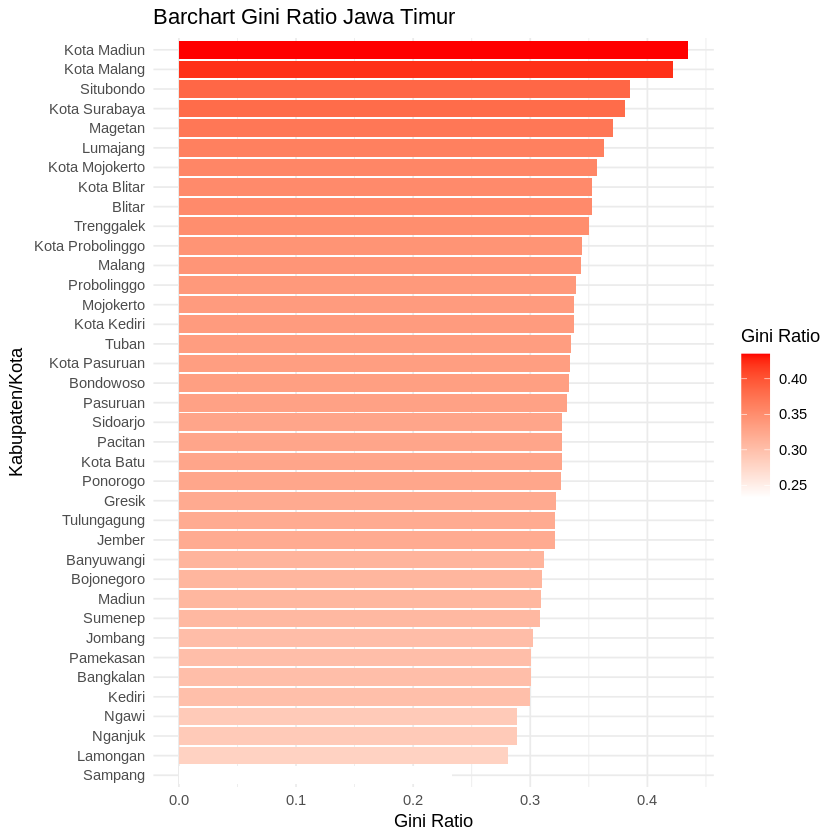

In [ ]:
# Urutkan dari yang paling tinggi
maps_bar <- maps_with_res %>%
  st_drop_geometry() %>%   # Drop geometry untuk plot biasa
  arrange(desc(GiniRatio))

# Plot
ggplot(maps_bar, aes(x = reorder(Kabupaten, GiniRatio), y = GiniRatio, fill = GiniRatio)) +
  geom_col() +
  coord_flip() +
  scale_fill_gradient(low = "white", high = "red", name = "Gini Ratio") +
  labs(
    x = "Kabupaten/Kota",
    y = "Gini Ratio",
    title = "Barchart Gini Ratio Jawa Timur"
  ) +
  theme_minimal()



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

Map saved to RLS_map.png

Resolution: 3600 by 2400 pixels

Size: 12 by 8 inches (300 dpi)



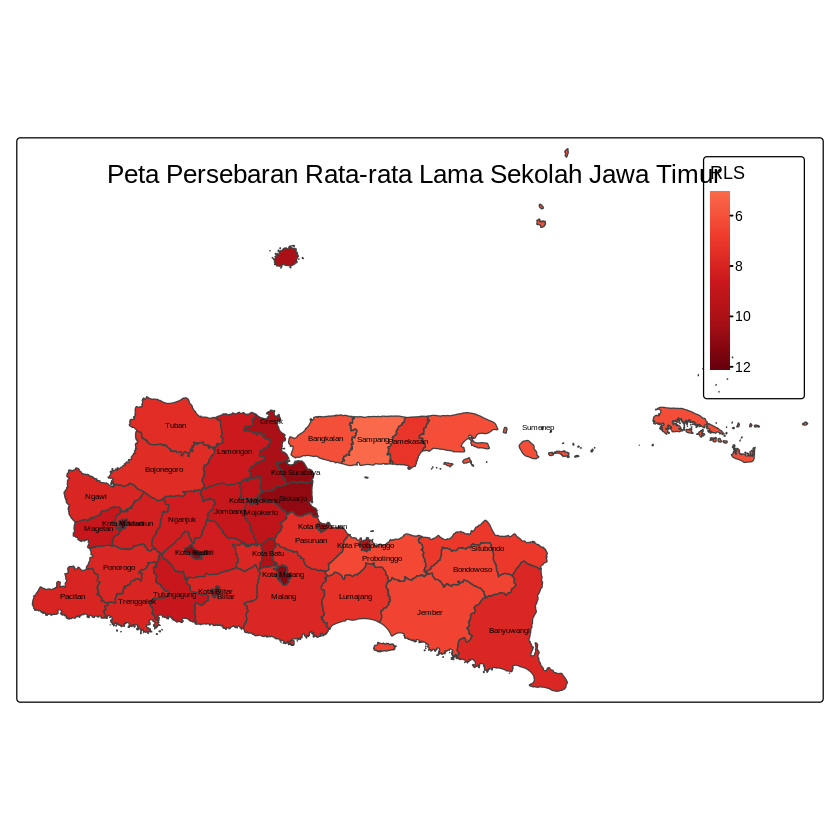

In [ ]:
# Load the shapefile again since the geometry was dropped in a previous step
RLS_map <- tm_shape(maps_with_res) +
    tm_fill("RLS",
            fill.scale = tm_scale_continuous(values = "Reds", midpoint = 0),
            fill.legend = tm_legend(title = "RLS")) +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Transparent background
        legend.width = c(6),
        legend.frame = FALSE
    ) +
    tm_title("Peta Persebaran Rata-rata Lama Sekolah Jawa Timur", position = c("center", "top"))

print(RLS_map)
tmap_save(RLS_map, filename = "RLS_map.png", width = 12, height = 8, units = "in")

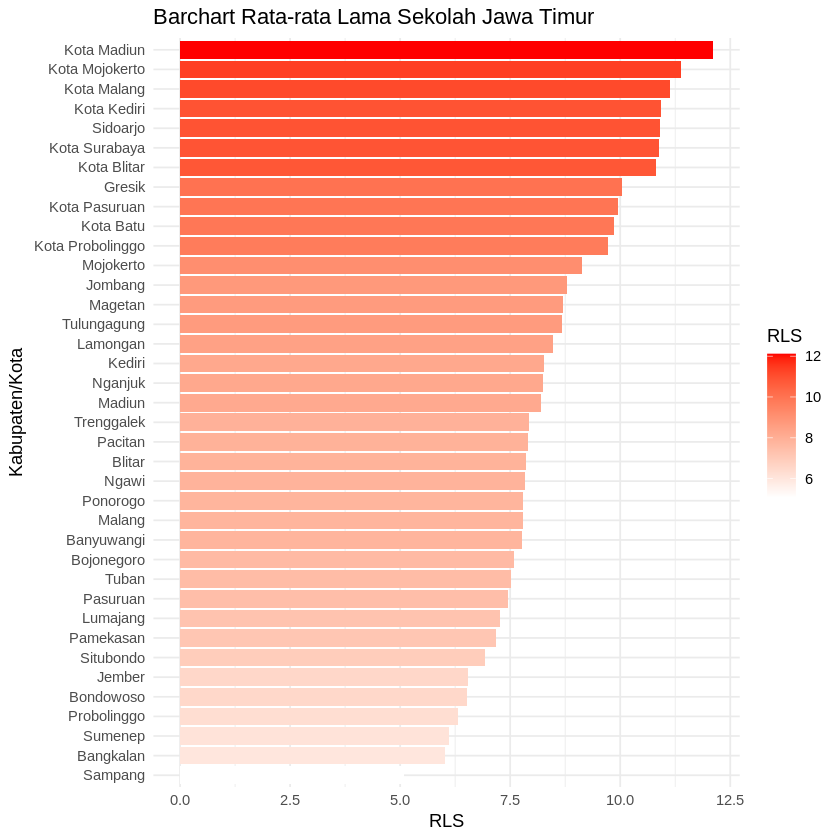

In [ ]:
# Urutkan dari yang paling tinggi
maps_bar <- maps_with_res %>%
  st_drop_geometry() %>%   # Drop geometry untuk plot biasa
  arrange(desc(RLS))

# Plot
ggplot(maps_bar, aes(x = reorder(Kabupaten, RLS), y = RLS, fill = RLS)) +
  geom_col() +
  coord_flip() +
  scale_fill_gradient(low = "white", high = "red", name = "RLS") +
  labs(
    x = "Kabupaten/Kota",
    y = "RLS",
    title = "Barchart Rata-rata Lama Sekolah Jawa Timur"
  ) +
  theme_minimal()



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

Map saved to MEDIS_map.png

Resolution: 3600 by 2400 pixels

Size: 12 by 8 inches (300 dpi)



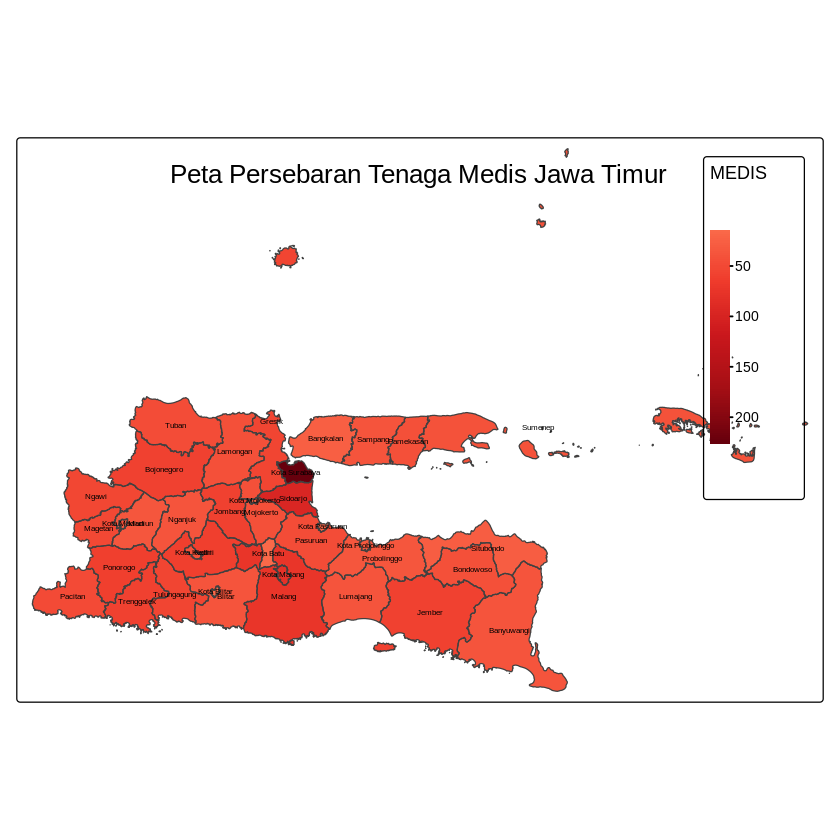

In [ ]:
# Load the shapefile again since the geometry was dropped in a previous step
MEDIS_map <- tm_shape(maps_with_res) +
    tm_fill("MEDIS",
            fill.scale = tm_scale_continuous(values = "Reds", midpoint = 0),
            fill.legend = tm_legend(title = "MEDIS")) +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Transparent background
        legend.width = c(6),
        legend.frame = FALSE
    ) +
    tm_title("Peta Persebaran Tenaga Medis Jawa Timur", position = c("center", "top"))

print(MEDIS_map)
tmap_save(MEDIS_map, filename = "MEDIS_map.png", width = 12, height = 8, units = "in")

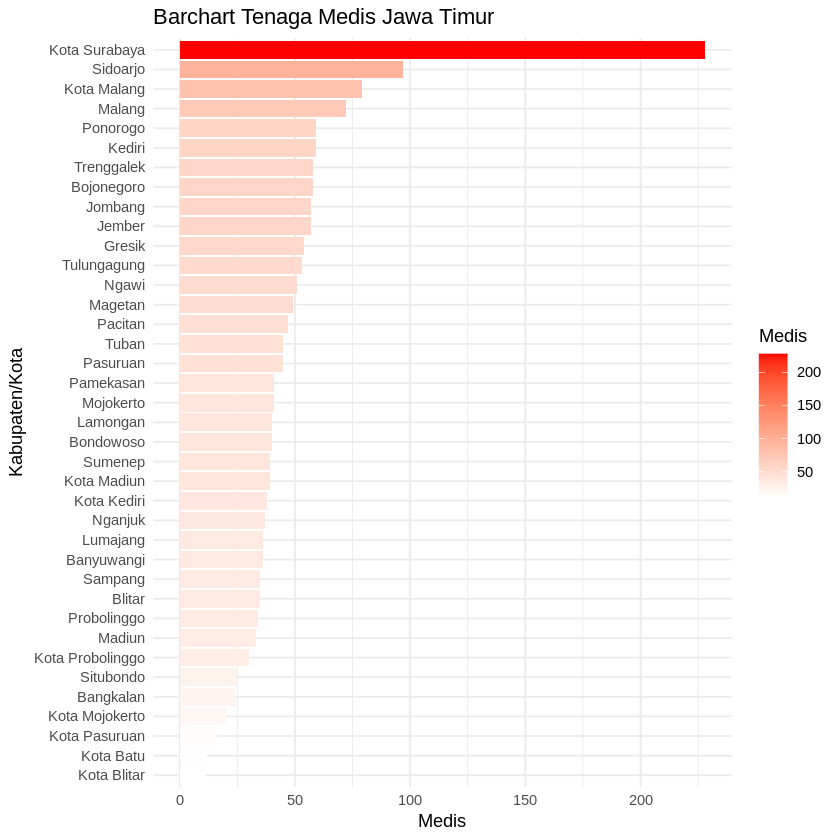

In [ ]:
# Urutkan dari yang paling tinggi
maps_bar <- maps_with_res %>%
  st_drop_geometry() %>%   # Drop geometry untuk plot biasa
  arrange(desc(MEDIS))

# Plot
ggplot(maps_bar, aes(x = reorder(Kabupaten, MEDIS), y = MEDIS, fill = MEDIS)) +
  geom_col() +
  coord_flip() +
  scale_fill_gradient(low = "white", high = "red", name = "Medis") +
  labs(
    x = "Kabupaten/Kota",
    y = "Medis",
    title = "Barchart Tenaga Medis Jawa Timur"
  ) +
  theme_minimal()



── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_text()`: migrate the layer options 'shadow' to 'options =
opt_tm_text(<HERE>)'
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

Map saved to MOTOR_map.png

Resolution: 3600 by 2400 pixels

Size: 12 by 8 inches (300 dpi)



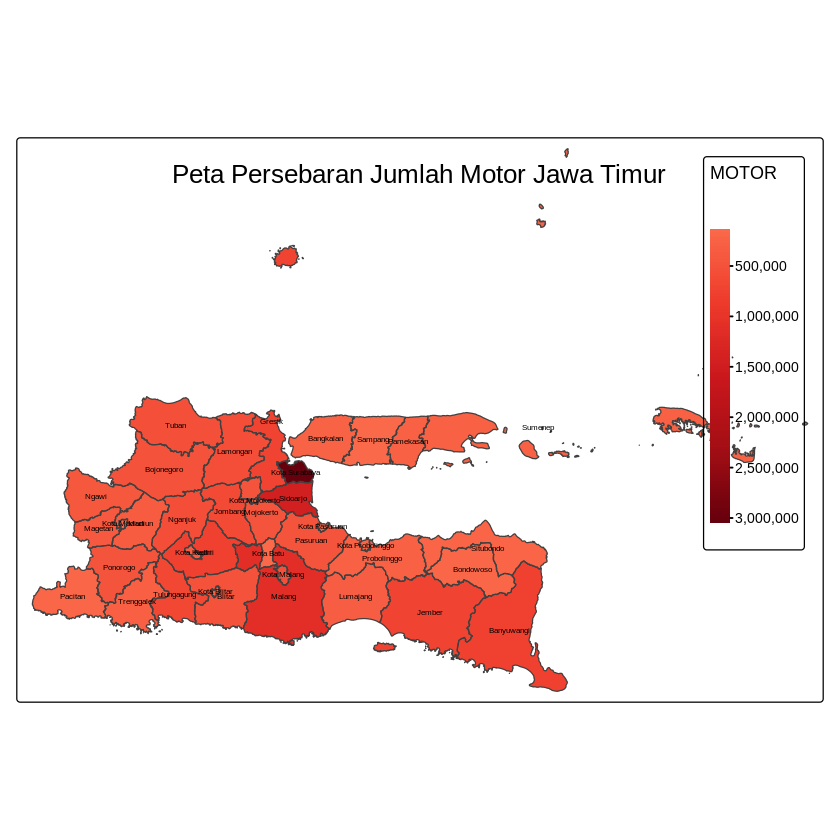

In [ ]:
# Load the shapefile again since the geometry was dropped in a previous step
MOTOR_map <- tm_shape(maps_with_res) +
    tm_fill("MOTOR",
            fill.scale = tm_scale_continuous(values = "Reds", midpoint = 0),
            fill.legend = tm_legend(title = "MOTOR")) +
    tm_borders() +
    tm_text("Kabupaten", size = 0.4, col = "black", shadow = TRUE) +
    tm_layout(
        legend.position = c("right", "top"),   # Move legend to top-right
        legend.bg.color = "white",              # Optional: white background for readability
        legend.bg.alpha = 0,                    # Transparent background
        legend.width = c(6),
        legend.frame = FALSE
    ) +
    tm_title("Peta Persebaran Jumlah Motor Jawa Timur", position = c("center", "top"))

print(MOTOR_map)
tmap_save(MOTOR_map, filename = "MOTOR_map.png", width = 12, height = 8, units = "in")

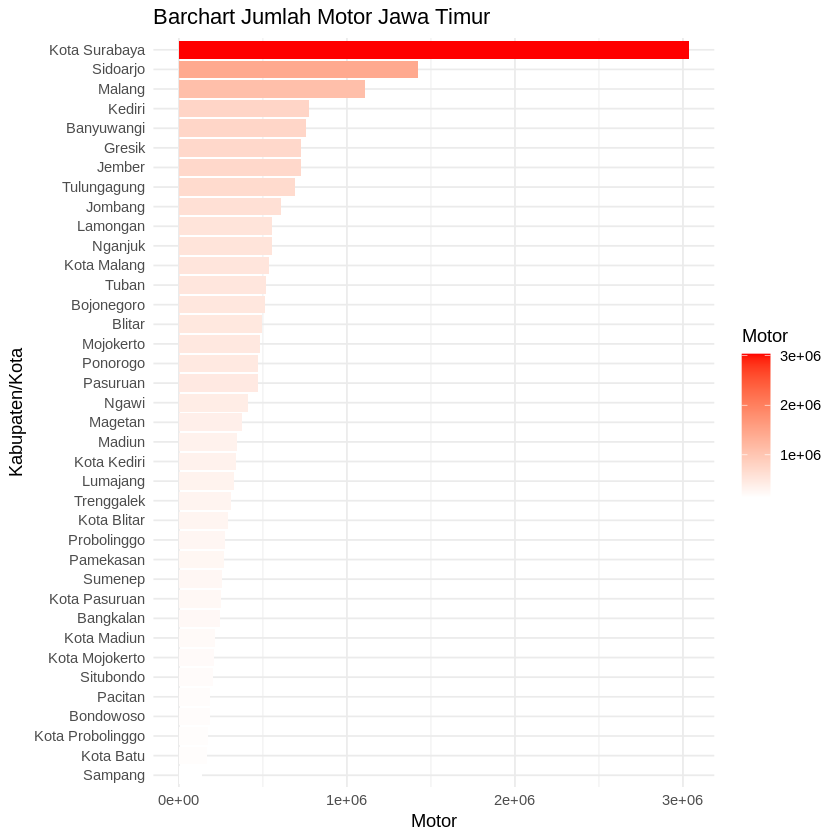

In [ ]:
# Urutkan dari yang paling tinggi
maps_bar <- maps_with_res %>%
  st_drop_geometry() %>%   # Drop geometry untuk plot biasa
  arrange(desc(MOTOR))

# Plot
ggplot(maps_bar, aes(x = reorder(Kabupaten, MOTOR), y = MOTOR, fill = MOTOR)) +
  geom_col() +
  coord_flip() +
  scale_fill_gradient(low = "white", high = "red", name = "Motor") +
  labs(
    x = "Kabupaten/Kota",
    y = "Motor",
    title = "Barchart Jumlah Motor Jawa Timur"
  ) +
  theme_minimal()